![image](./images/pandas.png)

Pandas est le package de prédilection pour traiter des données structurées.

Pandas est basé sur 2 structures extrêmement liées les Series et le DataFrame.

Ces deux structures permettent de traiter des données sous forme de tableaux indexés.

Les classes de Pandas utilisent des classes de Numpy, il est donc possible d'utiliser les fonctions universelles de Numpy sur les objets Pandas.

In [1]:
# on importe pandas avec :
import pandas as pd
import numpy as np
%matplotlib inline

# Les Series de Pandas

- Les Series sont indexées, c'est leur avantage sur les arrays de NumPy
- On peut utiliser les fonctions `.values` et `.index` pour voir les différentes parties de chaque Series
- On définit une Series par `pd.Series([,], index=['','',])`
- On peut appeler un élément avec `ma_serie['France']`
- On peut aussi faire des conditions :
```python
ma_serie[ma_serie>5000000]
```
```
'France' in ma_serie
```
- Les objets Series peuvent être transformés en dictionnaires en utilisant :
`.to_dict()`

In [2]:
ser_pop = pd.Series([70,8,300,1200], index=["France","Suisse","USA", "Chine"],dtype=float)

In [3]:
ser_pop

France      70.0
Suisse       8.0
USA        300.0
Chine     1200.0
dtype: float64

In [4]:
ser_pop[["Chine","USA"]]

Chine    1200.0
USA       300.0
dtype: float64

In [5]:
ser_pop.iloc[1:4]

Suisse       8.0
USA        300.0
Chine     1200.0
dtype: float64

**Exercice :**
    
Définir un objet Series comprenant la population de 5 pays puis afficher les pays ayant une population > 50’000’000.


In [6]:
ser_pop[ser_pop>50]

France      70.0
USA        300.0
Chine     1200.0
dtype: float64

# D'autres opérations sur les objets series

- Pour définir le nom de la Series, on utilise `.name`
- Pour définir le titre de la colonne des observations, on utilise `.index.name`

# Les données manquantes

Dans pandas, les données manquantes sont identifiés avec les fonctions de Numpy (`np.nan`). On a d'autres fonctions telles que :

In [7]:
pd.Series([2,np.nan,4],index=['a','b','c']).max()

4.0

In [8]:
pd.isna(pd.Series([2,np.nan,4],index=['a','b','c']))

a    False
b     True
c    False
dtype: bool

In [9]:
pd.notna(pd.Series([2,np.nan,4],index=['a','b','c']))

a     True
b    False
c     True
dtype: bool

# Les dates avec pandas

- Python possède un module datetime qui permet de gérer facilement des dates
- Pandas permet d'appliquer les opérations sur les dates aux Series et aux DataFrame
- Le format es dates Python est `YYYY-MM-DD HH:MM:SS`

- On peut générer des dates avec la fonction `pd.date_range()` avec différente fréquences `freq=`
- On peut utiliser ces dates comme index dans un DataFrame ou dans un objet Series
- On peut changer la fréquence en utilisant `.asfreq()`
- Pour transformer une chaine de caractère en date, on utilise `pd.to_datetime()` avec l’option `dayfirst=True` si on est dans le cas français
-On pourra aussi spécifier un format pour accélérer le processus `%Y%m%d`

In [10]:
pd.datetime.today()

datetime.datetime(2019, 6, 21, 11, 16, 6, 389928)

**Exercice :**

Créez un objet Series et ajoutez des dates partant du 3 octobre 2017 par jour jusqu’à aujourd’hui. Afficher le résultat dans un graphique (on utilisera la méthode `.plot()`

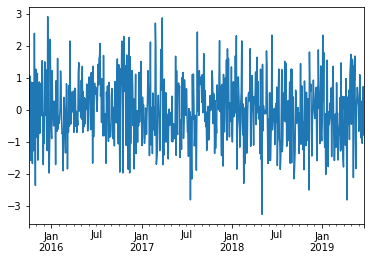

In [11]:
dates = pd.date_range("2015-10-3", pd.datetime.today(),freq = "2D")
ser_action = pd.Series(np.random.randn(len(dates)), index=dates)
ser_action.plot()

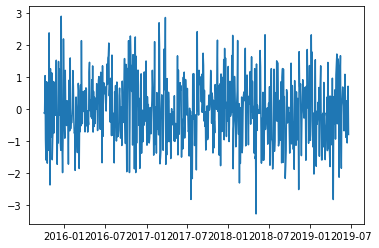

In [12]:
import matplotlib.pyplot as plt
plt.plot(ser_action)

In [13]:
ser_action.index.weekday_name

Index(['Saturday', 'Monday', 'Wednesday', 'Friday', 'Sunday', 'Tuesday',
       'Thursday', 'Saturday', 'Monday', 'Wednesday',
       ...
       'Sunday', 'Tuesday', 'Thursday', 'Saturday', 'Monday', 'Wednesday',
       'Friday', 'Sunday', 'Tuesday', 'Thursday'],
      dtype='object', length=679)

In [14]:
dates = pd.DataFrame(dates,columns=["Dates"])

In [15]:
dates["jour de la semaine"] = dates["Dates"].dt.week

In [16]:
dates[dates["Dates"]=="2016-01-21"]

,Dates,jour de la semaine
55,2016-01-21,3


# Aller plus loin avec les dates

- On peut définir avec pandas des fuseaux horaires
    - On utilise `.tz_localize("Europe/Paris")`
    - On peut changer de fuseau horaire avec `.tz_convert()`

- On peut aussi travailler sur des périodes plutôt que sur des dates
    - On utilise `pd.period_range()`


# Le DataFrame 

- Les DataFrame sont des objets très souples pouvant être construits de différentes façon
- On peut les construire en récupérant des données copier / coller, où directement sur Internet, ou en entrant les valeurs manuellement


- Les DataFrame se rapprochent des dictionnaires et on peut construire ces objets en utilisant `DataFrame(dico)`
- De nombreux détails sur la création des DataFrame se trouve sur ce site :

<http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html>


# Construction de DataFrame

On peut simplement construire un DataFrame avec le classe pd.DataFrame() à partir de différentes structures :

In [17]:
frame1=pd.DataFrame(np.random.randn(10).reshape(5,2),
             index=["obs_"+str(i) for i in range(5)],
             columns=["col_"+str(i) for i in range(2)])
frame1

,col_0,col_1
obs_0,-0.633314,-1.416898
obs_1,-0.601312,-0.519941
obs_2,-1.335992,-0.508339
obs_3,-0.947259,-2.605874
obs_4,-0.285112,-0.199775


# Opérations sur les DataFrame

On peut afficher le nom des colonnes :

In [18]:
print(frame1.columns)

Index(['col_0', 'col_1'], dtype='object')


On peut accéder à une colonne avec :
- `frame1.col_0` : attention au cas de nom de colonnes avec des espaces...
- `frame1['col_0']`

On peut accéder à une cellule avec :
- `frame1.loc['obs1','col_0']` : on utilise les index et le nom des colonnes
- `frame1.iloc[1,0]` : on utilise les positions dans le DataFrame


# Options de visualisation et de résumé

Pour afficher les 3 premières lignes, on peut utiliser :


In [19]:
frame1.head(3)

,col_0,col_1
obs_0,-0.633314,-1.416898
obs_1,-0.601312,-0.519941
obs_2,-1.335992,-0.508339


Pour afficher un résumé du DF :

In [20]:
frame1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, obs_0 to obs_4
Data columns (total 2 columns):
col_0    5 non-null float64
col_1    5 non-null float64
dtypes: float64(2)
memory usage: 120.0+ bytes


# Importer des données externes

Pandas est l'outil le plus efficace pour importer des données externes, il prend en charge de nombreux formats dont csv, Excel, SQL, SAS...


## Importation de données avec Pandas

Quel que soit le type de fichier, Pandas possède une fonction :
```python
frame=pd.read_...('chemin_du_fichier/nom_du_fichier',...)
```
Pour écrire un DataFrame dans un fichier, on utilise :
```python
frame.to_...('chemin_du_fichier/nom_du_fichier',...)
```

**Exercice :**
    
Importer un fichier `.csv` avec `pd.read_csv()`. On utilisera le fichier "./data/airbnb.csv"

In [21]:
airbnb = pd.read_csv("https://www.stat4decision.com/airbnb.csv")

C:\Users\s4d-asus-14\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20190507030954,2019-05-07,zen and calm,Appartement très calme de 50M2 Utilisation de ...,I bedroom appartment in Paris 14,I bedroom appartment in Paris 14 Good restaura...,none,Good restaurants very close the Montparnasse S...,...,f,f,flexible,f,f,1,1,0,0,0.28
1,5396,https://www.airbnb.com/rooms/5396,20190507030954,2019-05-08,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","Small, well appointed studio apartment at the ...","Cozy, well-appointed and graciously designed s...",none,"You are within walking distance to the Louvre,...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,1.44
2,7397,https://www.airbnb.com/rooms/7397,20190507030954,2019-05-07,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",PLEASE ASK ME BEFORE TO MAKE A REQUEST !!! No ...,"VERY CONVENIENT, WITH THE BEST LOCATION ! PLEA...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.47
3,8522,https://www.airbnb.com/rooms/8522,20190507030954,2019-05-08,GREAT FLAT w/ CITY VIEW,NaN,Really nice flat located in the 20th district ...,Really nice flat located in the 20th district ...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.01
4,9359,https://www.airbnb.com/rooms/9359,20190507030954,2019-05-07,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",Location! Location! Location! Just bring your ...,"Since I live in the USA, it is difficult to ma...",Location! Location! Location! Just bring your ...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,1,0,0,NaN


In [23]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59126 entries, 0 to 59125
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 47.8+ MB


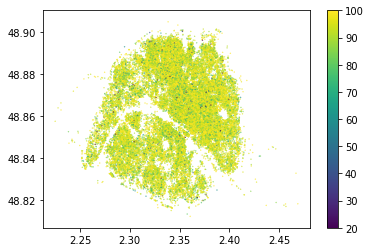

In [24]:
import matplotlib.pyplot as plt
plt.scatter("longitude","latitude",data = airbnb, s=0.1, c="review_scores_rating")
plt.colorbar()

In [25]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

# D'autres types de données

## JSON
Les objets JSON ressemblent à des dictionnaires.

On utilise le module `json` puis la fonction `json.loads()` pour transformer une entrée JSON en objet json

## HTML
On utilise `pd.read_html(url)`. Cet fonction est basée sur les packages `beautifulsoup` et `html5lib`

Cette fonction renvoie une liste de DataFrame qui représentent tous les DataFrame de la page. On ira ensuite chercher l'élément qui nous intéresse avec `frame_list[0]`

**Exercice :**
    
Importez un tableau en html depuis la page <http://www.fdic.gov/bank/individual/failed/banklist.html>

In [26]:
bank = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [27]:
frame_bank = bank[0]

In [28]:
frame_bank.columns

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

In [29]:
frame_bank['ST'].value_counts()

GA    93
FL    75
IL    69
CA    41
MN    23
WA    19
AZ    16
MO    16
MI    14
TX    13
NV    12
WI    11
KS    10
PA    10
MD    10
CO    10
SC    10
UT     8
OH     8
NJ     7
NC     7
AL     7
TN     7
OK     7
OR     6
VA     5
NY     5
AR     4
PR     4
LA     4
NE     3
IN     3
NM     3
ID     2
IA     2
KY     2
CT     2
MS     2
WY     1
HI     1
WV     1
NH     1
SD     1
MA     1
Name: ST, dtype: int64

# Importer depuis Excel

On a deux approches pour Excel :
- On peut utiliser `pd.read_excel()`
- On peut utiliser la classe `pd.ExcelFile()`

Dans ce cas, on utilise :
```python
xlsfile=pd.ExcelFile('fichier.xlsx')
xlsfile.parse('Sheet1')
```

**Exercice :** 
    
Importez un fichier Excel avec les deux approches, on utilisera : `credit2.xlsx` et `ville.xls`

In [30]:
credit = pd.read_excel("./data/credit2.xlsx",)

In [31]:
credit.head()

,Age,Gender,Marital_Status,Age_Youngest_Child,Number_of_Workers_in_Household,Percentage_White_Collar_Workers,Household_Debt_to_Equity_Ratio,Income,Homeowner,Customer_ID
0,40,F,S,11,6,37,56,37073,F,5409
1,47,M,M,13,13,30,56,50721,F,5477
2,35,F,U,1,9,33,57,43578,T,5507
3,45,M,U,15,7,30,62,69553,F,8
4,13,F,S,0,7,27,64,37502,T,158


In [32]:
classeur_ville = pd.ExcelFile("./data/ville.xls")

In [33]:
classeur_ville.sheet_names

['ville', 'ville-ain']

In [36]:
frame_ville = classeur_ville.parse(classeur_ville.sheet_names[0])

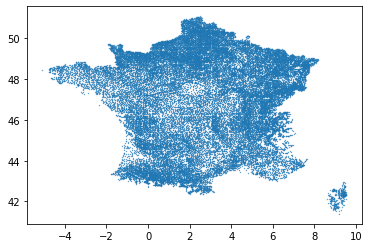

In [37]:
plt.scatter(' Longitude ',' Latitude ',data=frame_ville,s=0.1)

# Importer des données SQL

Pandas possède une fonction `read_sql()` qui permet d’importer directement des bases de données ou des queries dans des DataFrame

Il faut tout de même un connecteur pour accéder aux bases de données

Pour mettre en place ce connecteur, on utlise le package SQLAlchemy.

Suivant le type de base de données, on utilisera différents codes mais la structure du code est toujours la même

In [38]:
# on importe l'outil de connexion
from sqlalchemy import create_engine

On crée une connexion
```python
connexion=create_engine("sqlite:///(...).sqlite")
```

On utlise une des fonctions de Pandas pour charger les données
```python
requete="""select ... from ..."""
frame_sql=pd.read_sql_query(requete,connexion)
```

**Exercices :**
    
Importez la base de données SQLite salaries et récupérez la table Salaries dans un DataFrame 

In [39]:
connexion=create_engine("sqlite:///./data/salaries.sqlite")

salaries = pd.read_sql_table("Salaries",connexion)

In [40]:
salaries = pd.read_sql_query("select * from Salaries",connexion)

In [41]:
salaries.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0,0,-618.13,0,-618.13,-618.13,2014,,San Francisco,PT


In [42]:
connexion.table_names()

['Salaries']

In [43]:
salaries.shape

(148654, 13)

In [44]:
salaries.to_excel("salaires.xlsx")

## Importer depuis SAS

Si vous avez des données venant de SAS, vous pouvez bien entendu les exporter en csv... mais pandas possède une fonction `pd.read_sas()`

Attention le format d'encodage pourra être important, on utilise généralement  `iso-8859-1`

# Les tris avec Pandas 

Pour effectuer des tris, on utilise :
- `.sort_index()` pour le tri des index
- `.sort_values()` pour le tri des données
- `.rank()` affiche le rang des observations

Il peut y avoir plusieurs tris dans la même opération. Dans ce cas, on utilise des listes de colonnes :
```python
frame.sort_values(["col_1","col_2"])
```

**Exercice :** 
    
Triez les données sur les salaires en se basant sur le BasePay et le JobTitle

In [45]:
salaries.sort_values(by=["JobTitle","TotalPay"],ascending=[True,False])

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
20765,20766,NAPOLEON VIRAY,ACCOUNT CLERK,60838.2,0,0,,60838.20,60838.20,2011,,San Francisco,
20867,20868,BERNADETTE RAMOS,ACCOUNT CLERK,49777.8,10753.1,0,,60530.87,60530.87,2011,,San Francisco,
21638,21639,SUSAN CHANG,ACCOUNT CLERK,51306.3,5406.34,1814.58,,58527.20,58527.20,2011,,San Francisco,
22972,22973,OLIVIA BOUDREAUX,ACCOUNT CLERK,49778.2,3811.68,1084.76,,54674.59,54674.59,2011,,San Francisco,
24132,24133,LI-XIN CAI,ACCOUNT CLERK,49777.8,1390.45,624,,51792.25,51792.25,2011,,San Francisco,
24174,24175,LOLA THOMAS,ACCOUNT CLERK,49690.5,1356.88,622.87,,51670.27,51670.27,2011,,San Francisco,
24264,24265,TUONG TRUONG,ACCOUNT CLERK,49777.8,0,1618,,51395.80,51395.80,2011,,San Francisco,
24329,24330,AUDREY LEONG,ACCOUNT CLERK,49777.8,0,1440,,51217.78,51217.78,2011,,San Francisco,
24364,24365,WINNIE FUNG,ACCOUNT CLERK,49777.8,0,1300,,51077.78,51077.78,2011,,San Francisco,
24374,24375,ELAINE QUAN,ACCOUNT CLERK,49777.8,0,1285.5,,51063.32,51063.32,2011,,San Francisco,


# Les statistiques simples

Les Dataframe possèdent de nombreuses méthodes pour calculer des statistiques simples :
- `.sum(axis=0)` permet de faire une somme par colonne
- `.sum(axis=1)` permet de faire une somme par ligne
- `.min()` et `.max()` donnent le minimum par colonne
- `.idxmin()` et `.idxmax()` donnent l’index du minimum et du maximum
- `.describe()` affiche un tableau de statistiques descriptives par colonne
- `.corr()` pour calculer la corrélation entre les colonnes

**Exercice :**
    
Obtenir les différentes statistiques descriptives pour les données AirBnB.


In [46]:
salaries.describe(include="all")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
count,148654.000000,148654,148654,148654.0,148654.0,148654.0,148654,148654.000000,148654.000000,148654.000000,148654,148654,148654
unique,NaN,110811,2159,109491.0,65999.0,83226.0,98467,NaN,NaN,NaN,1,1,3
top,NaN,Kevin Lee,Transit Operator,0.0,0.0,0.0,,NaN,NaN,NaN,,San Francisco,
freq,NaN,13,7036,1298.0,77321.0,41600.0,36159,NaN,NaN,NaN,148654,148654,110535
mean,74327.500000,NaN,NaN,NaN,NaN,NaN,NaN,74768.321972,93692.554811,2012.522643,NaN,NaN,NaN
std,42912.857795,NaN,NaN,NaN,NaN,NaN,NaN,50517.005274,62793.533483,1.117538,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-618.130000,-618.130000,2011.000000,NaN,NaN,NaN
25%,37164.250000,NaN,NaN,NaN,NaN,NaN,NaN,36168.995000,44065.650000,2012.000000,NaN,NaN,NaN
50%,74327.500000,NaN,NaN,NaN,NaN,NaN,NaN,71426.610000,92404.090000,2013.000000,NaN,NaN,NaN
75%,111490.750000,NaN,NaN,NaN,NaN,NaN,NaN,105839.135000,132876.450000,2014.000000,NaN,NaN,NaN


In [47]:
salaries[["TotalPayBenefits","TotalPay"]].agg(["mean","std","median"])

,TotalPayBenefits,TotalPay
mean,93692.554811,74768.321972
std,62793.533483,50517.005274
median,92404.090000,71426.610000


# Le traitement des données manquantes

- Les données manquantes sont identifiées par `NaN`


- `.dropna()` permet de retirer les données manquantes dans un objet Series et l’ensemble d’une ligne dans le cas d’un DataFrame
- Pour éliminer par colonne, on utilise `.dropna(axis=1)`
- Remplacer toutes les données manquantes `.fillna(valeur)`


# Les jointures avec Pandas

On veut joindre des jeux de données en utilisant des clés (variables communes)

- `pd.merge()` permet de joindre deux DataFrame, on utilise comme options `on='key'`

- On peut utiliser comme option `how=`, on peut avoir :
    - `left` dans ce cas, on garde le jeu de données à gauche et pour les données de droite des valeurs manquantes sont ajoutées.
    - `outer`, on garde toutes les valeurs des deux jeux de données
    - ...

- On peut avoir plusieurs clés et faire une jointure sur les deux clés `on=['key1','key2']`

Pour plus de détails : <http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.merge.html>


In [48]:
# Pour joindre deux DataFrame
# pd.merge()
# salaries.merge().merge()

# Pour joindre plus de deux DataFrame
# salaries.join()

In [49]:
# Pour une jointure floue
# pd.merge_asof()

# Gestion des duplications

- On utilise `.duplicated()` ou `.drop_duplicates()` dans le cas où on désire effacer les lignes se répétant


- On peut se concentrer sur une seule variables en entrant directement le nom de la variable. Dans ce cas, c’est la première apparition qui compte. Si on veut prendre la dernière apparition, on utilise l’option `keep="last"`. On pourra avoir :
```python
frame1.drop_duplicates(["col_0","col_1"],keep="last")
```

# Discrétisation

Pour discrétiser, on utilise la fonction `pd.cut()`, on va définir une liste de points pour discrétiser et on entre cette liste comme second paramètre de la fonction.

Une fois discrétisé, on peut afficher les modalités obtenues en utilisant `.categories`

On peut aussi compter les occurrence en utilisant `pd.value_counts()`

Il est aussi possible d’entrer le nombre de segments comme second paramètre

On utilisera aussi `qcut()`

**Exercice :**
    
Créez une variable dans le dataframe AirBnB pour obtenir des niveaux de prix.


In [50]:
# passage en numérique
airbnb["price_num"]=pd.to_numeric(airbnb["price"].str
                                  .replace("$","")
                                  .str.replace(",",""))

In [51]:
airbnb["price_disc"]=pd.cut(airbnb["price_num"],5)
airbnb["price_disc2"]=pd.qcut(airbnb["price_num"],5)

# Les tableaux croisés avec Pandas

Les DataFrame possèdent des méthodes pour générer des tableaux croisés, notamment :
```python
frame1.pivot_table()
```
Cette méthode permet de gérer de nombreux cas avec des fonctions standards et sur mesure.

**Exercice :**
    
Afficher un tableau Pivot pour les données AirBnB.

In [52]:
airbnb.pivot_table(values="price_num",index="instant_bookable",columns='room_type',
                  aggfunc="mean")

room_type,Entire home/apt,Private room,Shared room
instant_bookable,,,
f,110.205453,64.702384,44.870861
t,131.386023,181.365471,101.945455


# L'utilisation de GroupBy sur des DataFrame

- `.groupby` permet de rassembler des observations en fonction d’une variable dite de groupe


- Par exemple, `frame.groupby('X').mean()` donnera les moyennes par groupes de `X`


- On peut aussi utiliser `.size()` pour connaître la taille des groupes et utiliser d’autres fonctions (`.sum()`)


- On peut effectuer de nombreuses opérations de traitement avec le groupby


**Exercice :**
    
- Données sur les salaires


- On utilise le `groupby()` pour rassembler les types d’emploi


- Et on calcule des statistiques pour chaque type


On peut utiliser la méthode `.agg()` avec par exemple `'mean'` comme paramètre

On utilise aussi fréquemment la méthode `.apply()` combinée à une fonction lambda

In [55]:
salaries.groupby("JobTitle")["TotalPay"].mean()

JobTitle
ACCOUNT CLERK                                          44035.664337
ACCOUNTANT                                             47429.268000
ACCOUNTANT INTERN                                      29031.742917
ACPO,JuvP, Juv Prob (SFERS)                            62290.780000
ACUPUNCTURIST                                          67594.400000
ADMINISTRATIVE ANALYST                                 63954.867527
ADMINISTRATIVE ANALYST II                              61497.035000
ADMINISTRATIVE ANALYST III                             92698.515000
ADMINISTRATIVE ENGINEER                               127961.430000
ADMINISTRATIVE SERVICES MANAGER                        77015.580000
ADMINISTRATOR, SFGH MEDICAL CENTER                    257124.440000
AFFIRMATIVE ACTION SPECIALIST                          68213.983333
AGRICULTURAL INSPECTOR                                 53586.100000
AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI      1927.500000
AIRPORT ASSISTANT DEPUTY DIRECTOR, OPER

In [56]:
salaries.groupby("JobTitle").apply(lambda x : x["TotalPay"].mean())

JobTitle
ACCOUNT CLERK                                          44035.664337
ACCOUNTANT                                             47429.268000
ACCOUNTANT INTERN                                      29031.742917
ACPO,JuvP, Juv Prob (SFERS)                            62290.780000
ACUPUNCTURIST                                          67594.400000
ADMINISTRATIVE ANALYST                                 63954.867527
ADMINISTRATIVE ANALYST II                              61497.035000
ADMINISTRATIVE ANALYST III                             92698.515000
ADMINISTRATIVE ENGINEER                               127961.430000
ADMINISTRATIVE SERVICES MANAGER                        77015.580000
ADMINISTRATOR, SFGH MEDICAL CENTER                    257124.440000
AFFIRMATIVE ACTION SPECIALIST                          68213.983333
AGRICULTURAL INSPECTOR                                 53586.100000
AIRPORT ASSISTANT DEPUTY DIRECTOR, BUSINESS ADMINI      1927.500000
AIRPORT ASSISTANT DEPUTY DIRECTOR, OPER

# Aller plus loin : fuzzy matching et pandas

On peut utiliser `fuzzywizzy` sur un DataFrame Pandas

Essayez avec la base sur les salaires pour les JobTitle

In [57]:
from fuzzywuzzy import process
from fuzzywuzzy import fuzz

On peut déjà utiliser un `.contains()` pour extraire certains `JobTitle`

In [61]:
salaries[salaries["JobTitle"].str.lower().str.contains("nutrition")]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
12866,12867,DALILA PITTA,NUTRITIONIST,83897,0,1500,,85397.00,85397.00,2011,,San Francisco,
12949,12950,LINDA TSE,NUTRITIONIST,83897,0,1140,,85036.99,85036.99,2011,,San Francisco,
12960,12961,LAURA BRAININ-RODRIGUEZ,NUTRITIONIST,83897,0,1100,,84996.99,84996.99,2011,,San Francisco,
13301,13302,LINDA LAU,NUTRITIONIST,83897,0,0,,83896.99,83896.99,2011,,San Francisco,
13422,13423,NANCY FLYNN,NUTRITIONIST,83555.1,0,0,,83555.15,83555.15,2011,,San Francisco,
13534,13535,SUZANNE MALONE,NUTRITIONIST,81961,0,1140,,83100.97,83100.97,2011,,San Francisco,
13767,13768,CARRIE LEE,NUTRITIONIST,81091.8,0,1060,,82151.80,82151.80,2011,,San Francisco,
14013,14014,GAIL CAUDLE,NUTRITIONIST,81423.7,0,0,,81423.71,81423.71,2011,,San Francisco,
16083,16084,MARTHA DOMINGUEZ GLUMAZ,NUTRITIONIST,72592.5,0,1440,,74032.49,74032.49,2011,,San Francisco,
16595,16596,REBEKAH BUZOLICH,NUTRITIONIST,72619.4,0,0,,72619.40,72619.40,2011,,San Francisco,


Si on veut aller plus loin, on pourra utiliser sur choices qui sont les valeurs uniques des JobTitle :

`process.extract("Nutrition",choices,limit=30,
                  scorer=fuzz.token_sort_ratio)`

Essayez cette commande sur vos données :

In [62]:
process.extract("Nutrition",salaries["JobTitle"],limit=30, scorer=fuzz.token_sort_ratio)

[('NUTRITIONIST', 86, 12866),
 ('NUTRITIONIST', 86, 12949),
 ('NUTRITIONIST', 86, 12960),
 ('NUTRITIONIST', 86, 13301),
 ('NUTRITIONIST', 86, 13422),
 ('NUTRITIONIST', 86, 13534),
 ('NUTRITIONIST', 86, 13767),
 ('NUTRITIONIST', 86, 14013),
 ('NUTRITIONIST', 86, 16083),
 ('NUTRITIONIST', 86, 16595),
 ('NUTRITIONIST', 86, 17047),
 ('NUTRITIONIST', 86, 17224),
 ('NUTRITIONIST', 86, 18572),
 ('NUTRITIONIST', 86, 19228),
 ('NUTRITIONIST', 86, 21534),
 ('NUTRITIONIST', 86, 26200),
 ('NUTRITIONIST', 86, 26310),
 ('NUTRITIONIST', 86, 26396),
 ('NUTRITIONIST', 86, 26556),
 ('NUTRITIONIST', 86, 26974),
 ('NUTRITIONIST', 86, 29659),
 ('NUTRITIONIST', 86, 30950),
 ('NUTRITIONIST', 86, 31053),
 ('Nutritionist', 86, 48960),
 ('Nutritionist', 86, 48963),
 ('Nutritionist', 86, 48973),
 ('Nutritionist', 86, 49386),
 ('Nutritionist', 86, 49600),
 ('Nutritionist', 86, 49800),
 ('Nutritionist', 86, 49942)]

Si on veut appliquer une méthode sur toute une colonne, on pourra sutiliser :

In [67]:
def get_ratio(row):
    name = row['JobTitle']
    return fuzz.token_sort_ratio(name, "nutrition")

salaries[salaries.apply(get_ratio, axis=1) > 80]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
12866,12867,DALILA PITTA,NUTRITIONIST,83897,0,1500,,85397.00,85397.00,2011,,San Francisco,
12949,12950,LINDA TSE,NUTRITIONIST,83897,0,1140,,85036.99,85036.99,2011,,San Francisco,
12960,12961,LAURA BRAININ-RODRIGUEZ,NUTRITIONIST,83897,0,1100,,84996.99,84996.99,2011,,San Francisco,
13301,13302,LINDA LAU,NUTRITIONIST,83897,0,0,,83896.99,83896.99,2011,,San Francisco,
13422,13423,NANCY FLYNN,NUTRITIONIST,83555.1,0,0,,83555.15,83555.15,2011,,San Francisco,
13534,13535,SUZANNE MALONE,NUTRITIONIST,81961,0,1140,,83100.97,83100.97,2011,,San Francisco,
13767,13768,CARRIE LEE,NUTRITIONIST,81091.8,0,1060,,82151.80,82151.80,2011,,San Francisco,
14013,14014,GAIL CAUDLE,NUTRITIONIST,81423.7,0,0,,81423.71,81423.71,2011,,San Francisco,
16083,16084,MARTHA DOMINGUEZ GLUMAZ,NUTRITIONIST,72592.5,0,1440,,74032.49,74032.49,2011,,San Francisco,
16595,16596,REBEKAH BUZOLICH,NUTRITIONIST,72619.4,0,0,,72619.40,72619.40,2011,,San Francisco,
